# Assignment 2

### Folkert Stijnman - 10475206
### Introduction to Computational Science


![](problem1.png)

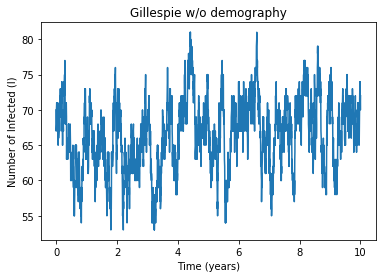

In [82]:
import numpy as np
import matplotlib.pyplot as plt


def gillespie(X, Y, N, beta, gamma):
    Transmission = beta * X * Y / N
    Recovery = gamma * Y
    R_total = Transmission + Recovery
    
    rand_1 = np.random.rand()
    rand_2 = np.random.rand()
    
    delta_t = - np.log(rand_1) / R_total
    if rand_2 < (Transmission / R_total):
        Y += 1
    else:
        Y -= 1
    return Y, delta_t

def discrete_event(X, Y, N, beta, gamma, tot_time):
    Y_data = [Y]
    x = [0]
    while x[-1] < tot_time and Y_data[-1] > 0:
        X = N - Y
        Y, t = gillespie(X, Y_data[-1], N, beta, gamma)

        Y_data.append(Y)
        x.append(x[-1] + t)
        
    return Y_data, x

beta = 0.03
gamma = 1 / 100.0
Y = 70.0
N = 100.0
X = N - Y

Y_data, x = discrete_event(X, Y, N, beta, gamma, 10*365)

plt.plot(np.array(x)/365, Y_data)
plt.title("Gillespie w/o demography")
plt.xlabel("Time (years)")
plt.ylabel("Number of Infected (I)")
plt.show()

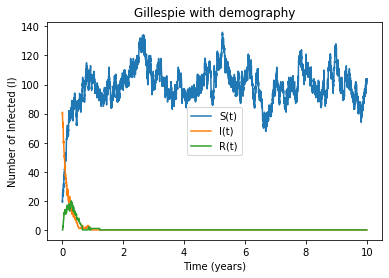

3.02


In [160]:
import numpy as np
import matplotlib.pyplot as plt


def gillespie_demography(pop, beta, gamma, mu):
    X, Y, Z = pop
    Birth = mu * N
    Death_X = mu * X
    Death_Y = mu * Y
    Death_Z = mu * Z
    Transmission = beta * X * Y / N
    Recovery = gamma * Y
    
    events = [[1, 0, 0], [-1, 0, 0], [0, -1, 0], [0, 0, -1], [-1, 1, 0], [0, -1, 1]]
    
    event_rates = [Birth, Death_X, Death_Y, Death_Z, Transmission, Recovery]
    R_total = np.sum(event_rates)
    
    rand_vec = np.random.rand(1, 6)
    
    with np.errstate(divide='ignore'):
        event_rates_t = np.divide(-np.log(rand_vec), event_rates)
    
    delta_t = np.min(event_rates_t)
    
    pop = np.array([X, Y, Z])
    pop += events[np.argmin(event_rates_t)]
    
    return list(pop), delta_t

def discrete_event_demography(pop, beta, gamma, mu, tot_time):
    pop_data = [pop]
    time = [0]
    while time[-1] < tot_time:
        pop, delta_t = gillespie_demography(pop, beta, gamma, mu)

        pop_data.append(pop)
        time.append(time[-1] + delta_t)
        
    return pop_data, time

beta = 0.03
gamma = 1 / 100.0
R_0 = beta / gamma + mu
mu = 0.02
Y = 80.0
X = 20.0
Z = 0
pop = [X, Y, Z]

# gillespie_demography(pop, beta, gamma, mu)

pop_data, x = discrete_event_demography(pop, beta, gamma, mu, 10*365)

pop_data = np.array(pop_data)

plt.plot(np.array(x)/365, pop_data[:,0], label="S(t)")
plt.plot(np.array(x)/365, pop_data[:,1], label="I(t)")
plt.plot(np.array(x)/365, pop_data[:,2], label="R(t)")
plt.title("Gillespie with demography")
plt.xlabel("Time (years)")
plt.ylabel("Number of Infected (I)")
plt.legend()
plt.show()
print(R_0)